# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     --- --------------------------------- 61.4/675.6 kB 812.7 kB/s eta 0:00:01
     ------------------ ------------------- 327.7/675.6 kB 2.9 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=353a27069bcbbb69080bf3d7fed9b65d618c4c245cb8cae2afbd1a5903672919
  Stored in directory: c:\users\camih\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=Sandy")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=45bad7ec7d9063c28f35676f279d677b&q=Sandy


In [9]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | beitbridge
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | fougamou
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | barcelos
Processing Record 12 of Set 1 | quellon
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | chernyshevskiy
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | huarmey
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | almeirim
Processing Record 22 of Set 1 | ma

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,14.45,64,94,5.81,NZ,1723350444
1,port-aux-francais,-49.3500,70.2167,4.24,92,100,13.71,TF,1723350445
2,beitbridge,-22.2167,30.0000,17.10,27,0,1.11,ZW,1723350446
3,west island,-12.1568,96.8225,28.99,65,67,4.12,CC,1723350447
4,carnarvon,-24.8667,113.6333,22.68,63,0,4.30,AU,1723350449


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,14.45,64,94,5.81,NZ,1723350444
1,port-aux-francais,-49.3500,70.2167,4.24,92,100,13.71,TF,1723350445
2,beitbridge,-22.2167,30.0000,17.10,27,0,1.11,ZW,1723350446
3,west island,-12.1568,96.8225,28.99,65,67,4.12,CC,1723350447
4,carnarvon,-24.8667,113.6333,22.68,63,0,4.30,AU,1723350449


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [5]:
date = time.strftime("%Y-%m-%d")
print(date)

2024-08-10


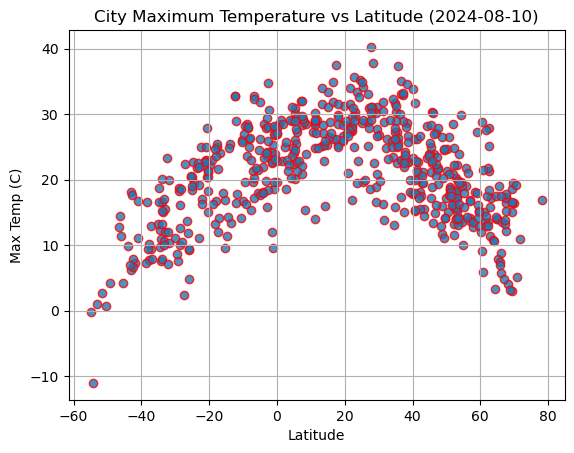

In [24]:
import time
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Maximum Temperature vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

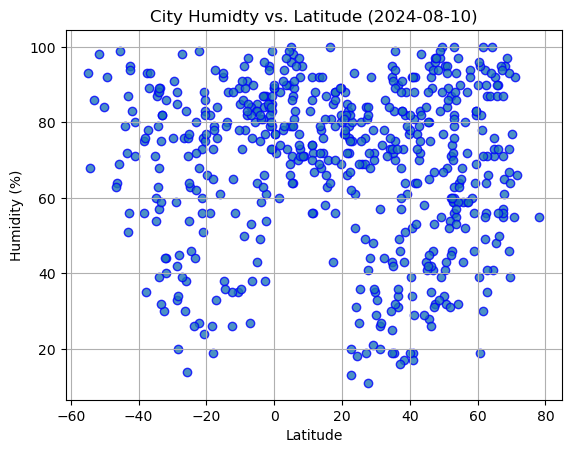

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Humidty vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

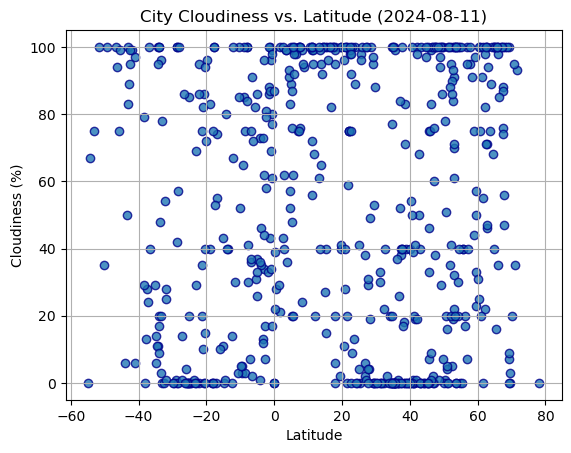

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="darkblue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Cloudiness vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

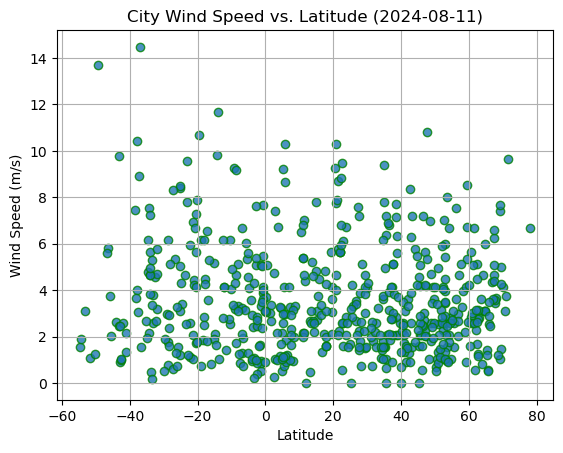

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Wind Speed vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    #compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,yellowknife,62.4560,-114.3525,21.29,56,100,5.14,CA,1723350453
10,barcelos,41.5388,-8.6151,22.73,92,19,0.89,PT,1723350456
15,isafjordur,66.0755,-23.1240,5.83,90,98,2.52,IS,1723350462
16,chernyshevskiy,63.0128,112.4714,17.18,66,94,2.79,RU,1723350463
24,prince rupert,54.3161,-130.3201,14.05,97,100,2.06,CA,1723350473


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,14.45,64,94,5.81,NZ,1723350444
1,port-aux-francais,-49.3500,70.2167,4.24,92,100,13.71,TF,1723350445
2,beitbridge,-22.2167,30.0000,17.10,27,0,1.11,ZW,1723350446
3,west island,-12.1568,96.8225,28.99,65,67,4.12,CC,1723350447
4,carnarvon,-24.8667,113.6333,22.68,63,0,4.30,AU,1723350449


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.397307400608437


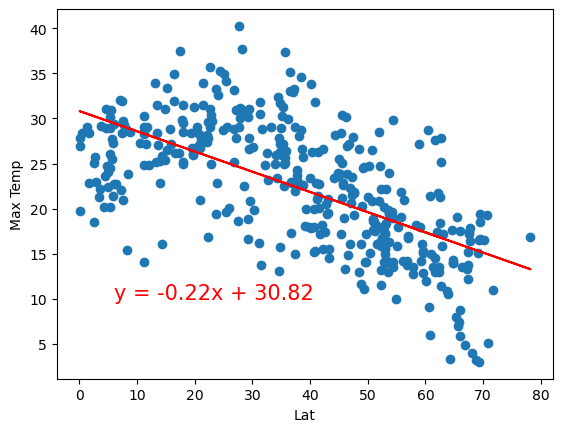

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 10))

The r-value is 0.5225964630920842


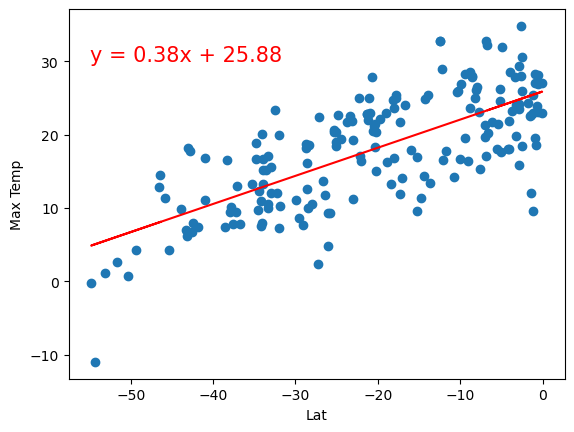

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

**Discussion about the linear relationship:** 
Testing the linear regression relationship between Maximum Temperature and Latitude of cities in both the southern and northern hemisphere resulted in a correlation coefficients (r-values) between 0.39 and 0.52. This indicates a moderate relationship between the variables tested. 
As latitude increases in northern hemisphere cities, max temperature can be expected to decline with moderate certainty. Likewise, as latitude increases in southern hemisphere cities, max temperature can be expected to increase with moderate certainty.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.01458685915538897


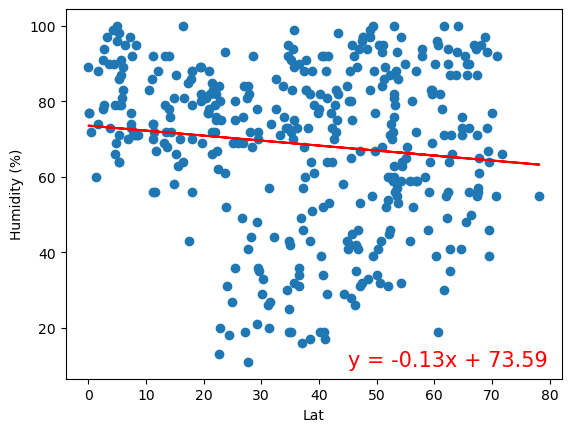

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity (%)", (45, 10))

The r-value is 0.00569350151674191


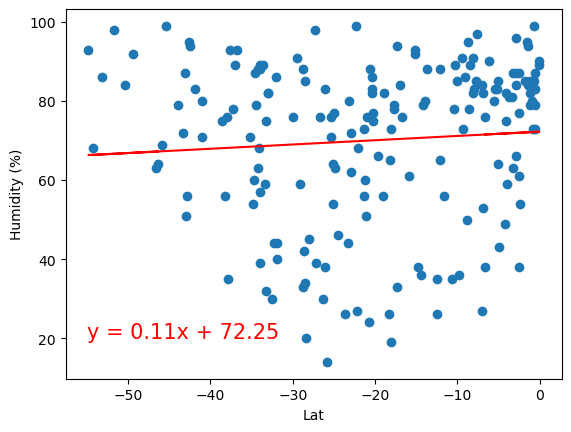

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity (%)", (-55, 20))

**Discussion about the linear relationship:** 
Testing the linear regression relationship between Humidity and Latitude of cities in both the southern and northern hemisphere resulted in a correlation coefficients (r-values) between 0.005 and 0.015. This indicates no relationship between the variables tested. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.004640819568186921


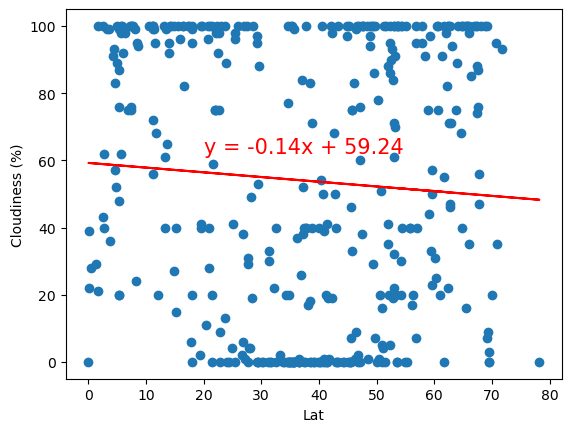

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness (%)", (20, 62))

The r-value is 0.0006988188385951789


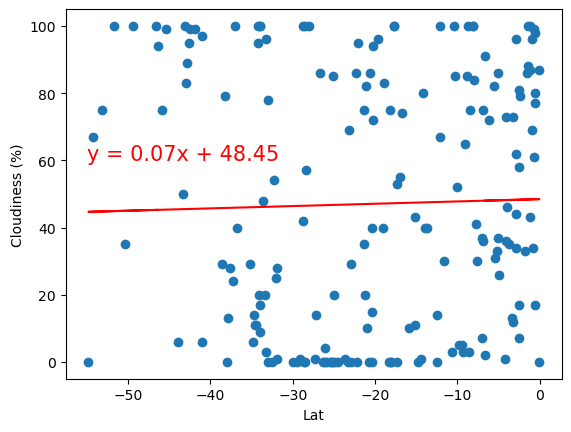

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness (%)", (-55, 60))

**Discussion about the linear relationship:** 
Testing the linear regression relationship between Cloudiness and Latitude of cities in both the southern and northern hemisphere resulted in a correlation coefficients (r-values) between 0.0007 and 0.0045. This indicates no relationship between the variables tested. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 1.0735316728980137e-08


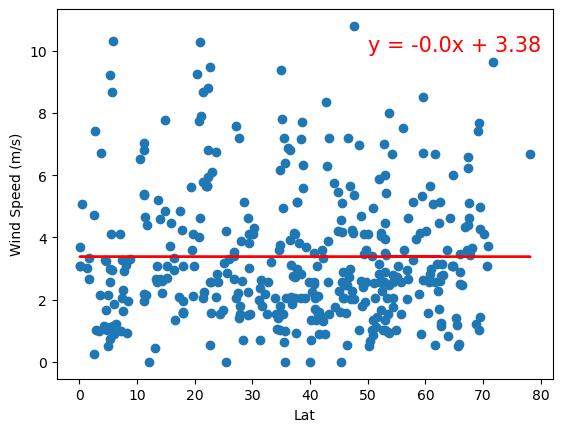

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed (m/s)", (50, 10))

The r-value is 0.008226846591066813


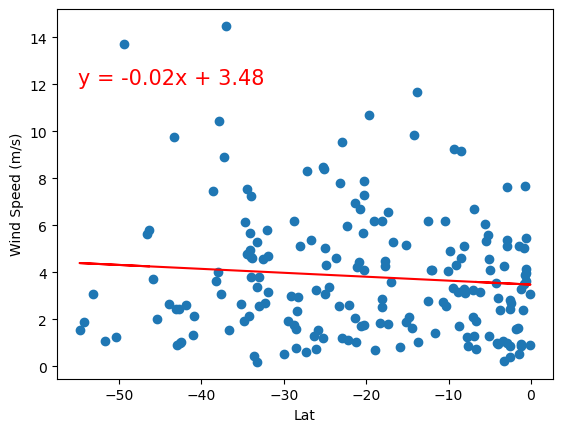

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed (m/s)", (-55, 12))

**Discussion about the linear relationship:** 
Testing the linear regression relationship between Wind Speed and Latitude of cities in both the southern and northern hemisphere resulted in a correlation coefficients (r-values) between 0 and 0.009. This indicates no relationship between the variables tested. 